**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

**Load Dataset**

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
X.shape, y.shape

((100, 2), (100,))

In [4]:
print(X[:5])
print(y[:5])

[[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]]
[1 1 1 0 1]


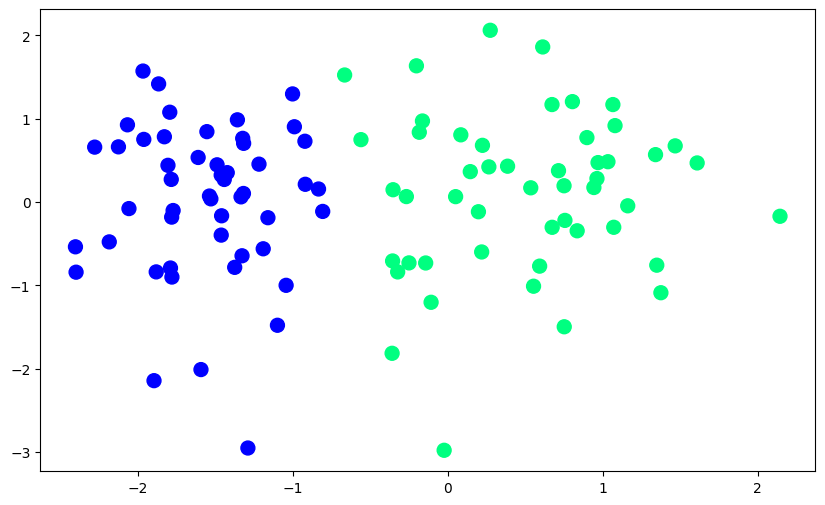

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

**Method-1**

- This function trains the perceptron model over 1000 iterations and returns the final weights after training. The weights are split into the intercept term (weights[0]) and the coefficients (weights[1:]).
- This function runs for 1000 iterations and returns the final intercept and weights (slope).

In [6]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term (column of ones) to X
    weights = np.ones(X.shape[1])  # Initialize weights with ones
    lr = 0.1  # Learning rate

    for i in range(1000):  # Loop over 1000 iterations
        j = np.random.randint(0, 100)  # Randomly select an index
        y_hat = step(np.dot(X[j], weights))  # Compute prediction
        weights = weights + lr * (y[j] - y_hat) * X[j]  # Update weights

    return weights[0], weights[1:]  # Return bias (intercept) and weights (coefficients)

In [7]:
intercept_, coef_ = perceptron(X,y)

In [8]:
print(coef_)
print(intercept_)

[1.36094711 0.03331867]
1.0


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

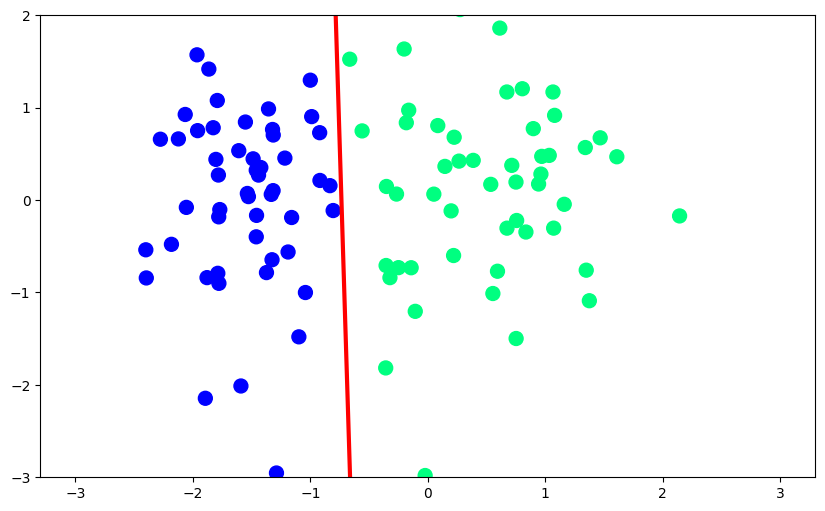

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

**Method-2**

- This function tracks the evolution of the decision boundary over 200 iterations. It stores the slope (m) and intercept (b) values at each iteration in lists, allowing you to see how the decision boundary changes as the perceptron learns.
- This function runs for 200 iterations and returns the list of slopes and intercepts after each iteration.

In [12]:
def step(z):
    return 1 if z>0 else 0

def Perceptron(X, y):
    m = []  # List to store slopes
    b = []  # List to store intercepts

    X = np.insert(X, 0, 1, axis=1)  # Add bias term (column of ones) to X
    weights = np.ones(X.shape[1])  # Initialize weights with ones
    lr = 0.1  # Learning rate

    for i in range(200):  # Loop over 200 iterations
        j = np.random.randint(0, 100)  # Randomly select an index
        y_hat = step(np.dot(X[j], weights))  # Compute prediction
        weights = weights + lr * (y[j] - y_hat) * X[j]  # Update weights

        m.append(-(weights[1] / weights[2]))  # Calculate and store slope
        b.append(-(weights[0] / weights[2]))  # Calculate and store intercept

    return m, b  # Return lists of slopes and intercepts over the iterations

In [13]:
m, b = Perceptron(X,y)

In [14]:
print(m)
print(b)

[-1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1004064096029276, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.1468948454151415, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.5990856780650338, -1.8783869479278041, -1.8783869479278041, -1.8783869479278041, -1.8783869479278041, -1.8783869479278041, -1.8783869479278041, -1.8783869479278041, -1.8783869479278041, -1.8783869479278041, -1.878386947

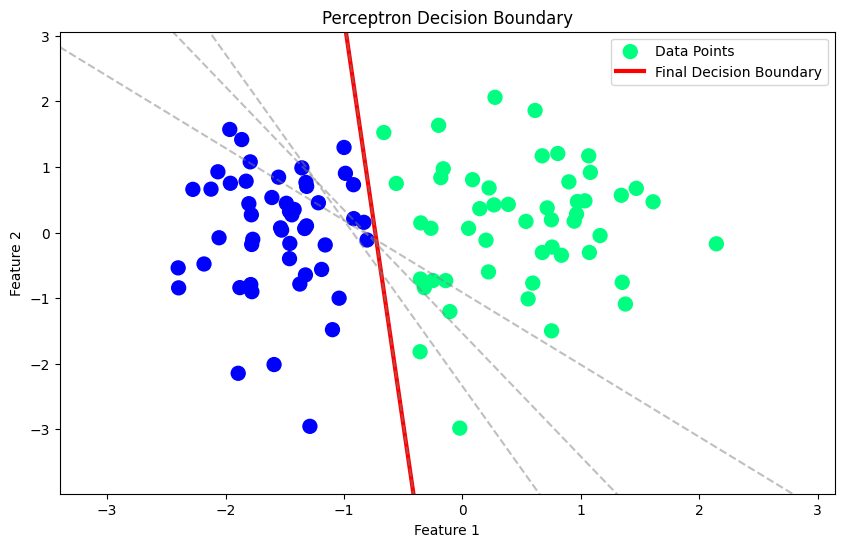

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100, label="Data Points")

# Generate x values for the decision boundary
x_values = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)

# Plot the final decision boundary
y_values = m[-1] * x_values + b[-1]
plt.plot(x_values, y_values, color='red', linewidth=3, label="Final Decision Boundary")

# Optionally, plot intermediate decision boundaries
for i in range(0, len(m), 50):  # Plot every 50th decision boundary
    y_values = m[i] * x_values + b[i]
    plt.plot(x_values, y_values, linestyle='--', color='gray', alpha=0.5)

# Step 6: Set plot limits and labels
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

**Animation**

In [16]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [17]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>